In [1]:
import matplotlib.pyplot as plt
import tqdm
import random
import numpy as np
import json
import os
import glob
from collections import Counter
from meta_maths import *

In [2]:
token = open('token.txt').read().strip()
os.environ['REPLICATE_API_TOKEN'] = token

In [3]:
# # The meta/meta-llama-3-70b-instruct model can stream output as it's running.
# for event in replicate.stream(
#     "meta/meta-llama-3-70b-instruct",
#     input={g
#         "top_k": 0,
#         "top_p": 0.9,
#         "prompt": "Can you tell me which model version you are and how many parameters you have?",
#         "max_tokens": 512,
#         "min_tokens": 0,
#         "temperature": 0.6,
#         "system_prompt": "You are a helpful assistant",
#         "length_penalty": 1,
#         "stop_sequences": "<|end_of_text|>,<|eot_id|>",
#         "prompt_template": "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n{prompt}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n",
#         "presence_penalty": 1.15,
#         "log_performance_metrics": False
#     },
# ):
#     print(str(event), end="")

In [5]:
# ai = MetaAI()
# response = ai.prompt(message="Can you tell me which version of model you are? Also, how many parameters do you have?")
# print(response)

In [6]:
expression = generate_multiplication_expression(5)
response = query_ai_replicate(expression)
print(f'Expression: {expression}     Response: {response}     Answer: {eval(expression)}')

Expression: 9413*8     Response: 75224     Answer: 75304


In [8]:
expression = generate_ooo_expression(n_ops=5, max_int=9)
response = query_ai_replicate(expression)
print(f'Expression: {expression}     Response: {response}     Answer: {eval(expression)}')

Expression: (6-7)*5-5-8+6     Response: -34     Answer: -12


In [8]:
# results = take_exam(n_questions=500, n_agents=25, n_ops=[1,2,3], max_int=99, savedir=f'math_outputs/test1_500questions_25agents_1-2-3ops_99maxint_nomodulo')
# results = take_exam(n_questions=500, n_agents=25, n_ops=[1,2,3], max_int=99, savedir=f'math_outputs/test1_500questions_25agents_1-2-3-4-5-6ops_9maxint_nomodulo')
# results = take_exam(n_questions=500, n_agents=25, n_ops=1, max_int=[3,4,5,6,7], savedir=f'math_outputs/test1_500questions_25agents_multiplication_3-7digits')

In [ ]:
results = take_exam(n_questions=156, n_agents=50, n_ops=[1,2,3,4,5,6], max_int=9, savedir=f'math_outputs/test1_500questions_50agents_1-2-3-4-5-6ops_9maxint_nomodulo')
# results = take_exam(n_questions=11, n_agents=50, n_ops=1, max_int=[3,4,5,6,7], savedir=f'math_outputs/test1_500questions_50agents_multiplication_3-7digits')

finished expression 366383*355
finished expression 99924117*2
finished expression 8930990*78
finished expression 50748635*8
finished expression 7142064*86
finished expression 7617*62754
finished expression 3283431*32
finished expression 671*434263
finished expression 62781440*2
finished expression 5910*85145
finished expression 7*59837564
finished expression 2271*65982
finished expression 304*583845
finished expression 9*55345798
finished expression 574*989968
finished expression 84793*1636
finished expression 252732*435
finished expression 868*160720
finished expression 64*2958675
finished expression 1477*74521
finished expression 533*277258
finished expression 4159*40715
finished expression 5200*82706
finished expression 47545*7879
finished expression 8408*65011
finished expression 74760*5749
finished expression 709*420239
finished expression 931*207093
finished expression 4*73868355
finished expression 9332689*45
finished expression 4996106*66
finished expression 50311*3292
finished

In [7]:
# Open ensemble results
questions = []
responses = []
answers = []
n_ops = []
n_agents = []
max_int = []

for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_50agents_1-2-3-4-5-6ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_multiplication_3-7digits/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3ops_99maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3-4-5-6ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_4-5-6ops_4maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/strevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint/*.json')):
    try:
        with open(file, 'r') as f:
            data = json.load(f)
            questions.append(data['expression'])
            responses.append(data['responses'])
            answers.append(data['correct'])
            n_ops.append(data['n_ops'])
            n_agents.append(data['n_agents'])
            max_int.append(data['max_int'])
    except:
        print(file)
        os.remove(file)

100%|██████████| 844/844 [00:00<00:00, 31870.00it/s]


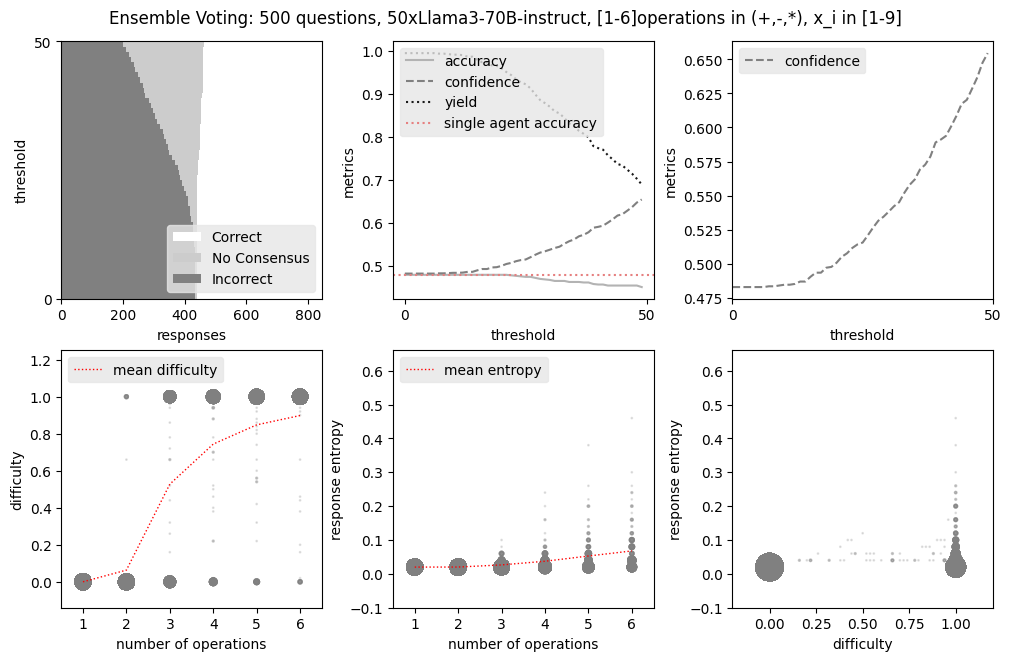

In [8]:
thresholds = 50
running_vals = [[vote_count([vote(responses[i], thresh, answers[i]) for i in range(len(responses))]) for thresh in np.linspace(0, 1, thresholds)]]

mean_values = np.mean(np.array(running_vals), axis=0)

accuracy = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
accuracy_mean = np.nanmean(accuracy, axis=0)

raw_yield = (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2]) / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
raw_yield_mean = np.nanmean(raw_yield, axis=0)

confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
confidence_mean = np.nanmean(confidence, axis=0)

confidence_std = np.nanstd(confidence, axis=0)
confidence_lower = np.nanpercentile(confidence, 2.5, axis=0)
confidence_upper = np.nanpercentile(confidence, 97.5, axis=0)

difficulty = []
for i in range(len(responses)):
    difficulty.append(1-np.sum(np.array(responses[i]) == answers[i])/len(responses[i]))
single_model_acc = 1-float(np.mean(np.array(difficulty)))


fig, ax = plt.subplots(2,3, figsize=(10,6.5), constrained_layout=True)

ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1] + np.array(mean_values)[:,2], fill=True, orientation='horizontal', color=[1,1,1], label='Correct')
ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1], fill=True, orientation='horizontal', color=[0.8,0.8,0.8], label='No Consensus')
ax[0,0].stairs(np.array(mean_values)[:,0], fill=True, orientation='horizontal', color=[0.5,0.5,0.5], label='Incorrect')
ax[0,0].set_ylim([0, thresholds])
ax[0,0].set_xlim([0, len(questions)])
ax[0,0].set_yticks([0, thresholds])
# ax[0,0].set_yticklabels(['0', '1'])
ax[0,0].set_ylabel('threshold')
ax[0,0].set_xlabel('responses')
ax[0,0].legend(loc = 'lower right', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,1].plot(accuracy_mean, color=[0.7,0.7,0.7], label='accuracy')
ax[0,1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,1].plot(raw_yield_mean, color=[0.1,0.1,0.1], linestyle=':', label='yield')
ax[0,1].set_ylabel('metrics')
ax[0,1].set_xlabel('threshold')
ax[0,1].set_xticks([0, thresholds])
# ax[0,1].set_xticklabels(['0', '1'])
ax[0,1].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[0,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,2].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,2].set_ylabel('metrics')
ax[0,2].set_xlabel('threshold')
ax[0,2].set_xlim([0, thresholds])
ax[0,2].set_xticks([0, thresholds])
# ax[0,2].set_xticklabels(['0', '1'])


ax[0,2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ops = [sum([1 for ch in question if ch in ['+', '-', '*']]) for question in questions]
c = Counter(zip(ops,difficulty))
s = [(c[(xx,yy)]) for xx,yy in zip(ops,difficulty)]
ax[1,0].scatter(np.array(ops), 
              np.array(difficulty), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,0].plot(n_ops[0],[float(np.mean(np.array(difficulty)[np.where(np.array(ops) == n_op)[0]])) for n_op in n_ops[0]], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean difficulty')
ax[1,0].set_xlabel('number of operations')
ax[1,0].set_ylabel('difficulty')
ax[1,0].set_xticks(n_ops[0])
ax[1,0].set_xlim([min(n_ops[0])-0.5, max(n_ops[0])+0.5])
ax[1,0].set_ylim([-0.14, 1.25])
ax[1,0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# entropy = normalized_entropy(responses)
entropy = simple_entropy(responses)

ops = [sum([1 for ch in question if ch in ['+', '-', '*']]) for question in questions]
c = Counter(zip(ops,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(ops,entropy)]
ax[1,1].scatter(np.array(ops), 
              np.array(entropy), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,1].plot(n_ops[0],[float(np.mean(np.array(entropy)[np.where(np.array(ops) == n_op)[0]])) for n_op in n_ops[0]], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean entropy')
ax[1,1].set_xlabel('number of operations')
ax[1,1].set_ylabel('response entropy')
ax[1,1].set_xticks(n_ops[0])
ax[1,1].set_xlim([min(n_ops[0])-0.5, max(n_ops[0])+0.5])
ax[1,1].set_ylim([-0.1, max(entropy)+0.2])
ax[1,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
ax[1,2].scatter(difficulty, entropy, s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,2].set_xlim([-0.2, 1.2])
ax[1,2].set_ylim([-0.1, max(entropy)+0.2])
ax[1,2].set_xlabel('difficulty')
ax[1,2].set_ylabel('response entropy')

# for a in ax.flatten()[1:]:
#     a.spines[['right', 'top']].set_visible(False)

# 
# suptitle(f'Ensemble Voting: {500} questions, {25}xLlama3-70B-instruct, [1-3]operations in (+,-,*), x_i in [1-99]', fontsize=12)
# plt.savefig(f'EnsembleVoting_q{500}_a{25}_1-3ops_1-99ints.png', format='png', dpi=300)

plt.suptitle(f'Ensemble Voting: {500} questions, {50}xLlama3-70B-instruct, [1-6]operations in (+,-,*), x_i in [1-9]', fontsize=12)
plt.savefig(f'EnsembleVoting_q{500}_a{50}_1-6ops_1-9ints.png', format='png', dpi=300)

In [3]:
# Open ensemble results
questions = []
responses = []
answers = []
n_ops = []
n_agents = []
max_int = []

for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_50agents_multiplication_3-7digits/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3ops_99maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3-4-5-6ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_4-5-6ops_4maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/strevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint/*.json')):
    try:
        with open(file, 'r') as f:
            data = json.load(f)
            questions.append(data['expression'])
            responses.append(data['responses'])
            answers.append(data['correct'])
            n_ops.append(data['n_ops'])
            n_agents.append(data['n_agents'])
            max_int.append(data['max_int'])
    except:
        print(file)
        os.remove(file)

100%|██████████| 1000/1000 [00:00<00:00, 31802.25it/s]


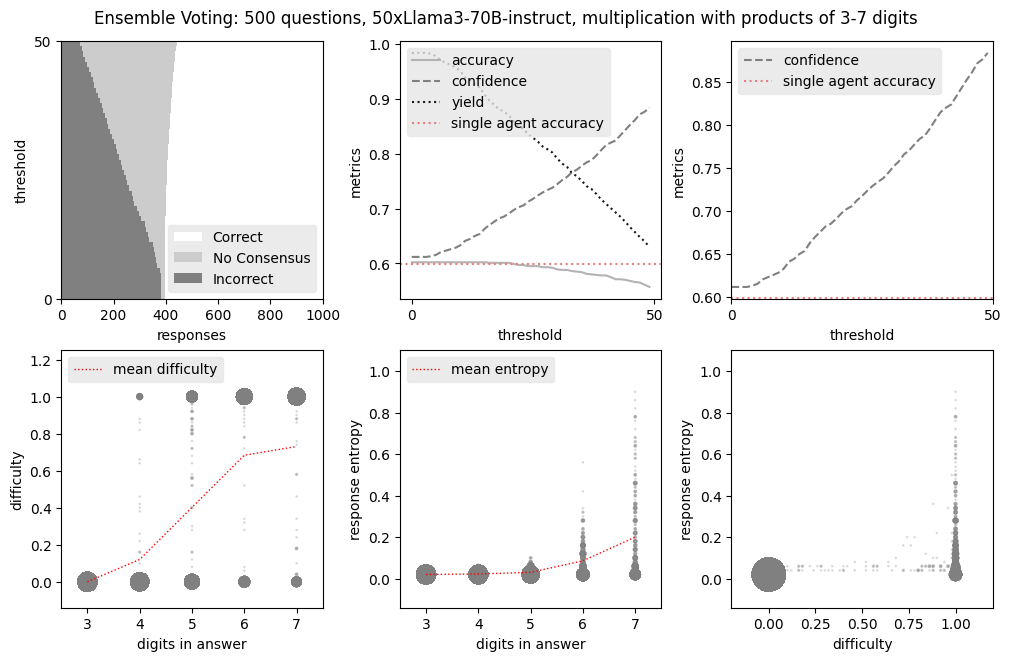

In [6]:
thresholds = 50
running_vals = [[vote_count([vote(responses[i], thresh, answers[i]) for i in range(len(responses))]) for thresh in np.linspace(0, 1, thresholds)]]

mean_values = np.mean(np.array(running_vals), axis=0)

accuracy = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
accuracy_mean = np.nanmean(accuracy, axis=0)

raw_yield = (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2]) / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
raw_yield_mean = np.nanmean(raw_yield, axis=0)

confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
confidence_mean = np.nanmean(confidence, axis=0)

confidence_std = np.nanstd(confidence, axis=0)
confidence_lower = np.nanpercentile(confidence, 2.5, axis=0)
confidence_upper = np.nanpercentile(confidence, 97.5, axis=0)

difficulty = []
for i in range(len(responses)):
    difficulty.append(1-np.sum(np.array(responses[i]) == answers[i])/len(responses[i]))
single_model_acc = 1-float(np.mean(np.array(difficulty)))


fig, ax = plt.subplots(2,3, figsize=(10,6.5), constrained_layout=True)

ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1] + np.array(mean_values)[:,2], fill=True, orientation='horizontal', color=[1,1,1], label='Correct')
ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1], fill=True, orientation='horizontal', color=[0.8,0.8,0.8], label='No Consensus')
ax[0,0].stairs(np.array(mean_values)[:,0], fill=True, orientation='horizontal', color=[0.5,0.5,0.5], label='Incorrect')
ax[0,0].set_ylim([0, thresholds])
ax[0,0].set_xlim([0, len(questions)])
ax[0,0].set_yticks([0, thresholds])
# ax[0,0].set_yticklabels(['0', '1'])
ax[0,0].set_ylabel('threshold')
ax[0,0].set_xlabel('responses')
ax[0,0].legend(loc = 'lower right', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,1].plot(accuracy_mean, color=[0.7,0.7,0.7], label='accuracy')
ax[0,1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,1].plot(raw_yield_mean, color=[0.1,0.1,0.1], linestyle=':', label='yield')
ax[0,1].set_ylabel('metrics')
ax[0,1].set_xlabel('threshold')
ax[0,1].set_xticks([0, thresholds])
# ax[0,1].set_xticklabels(['0', '1'])
ax[0,1].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[0,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,2].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,2].set_ylabel('metrics')
# ax[2].set_ylim([0.6, 1.05])
ax[0,2].set_xlabel('threshold')
ax[0,2].set_xlim([0, thresholds])
ax[0,2].set_xticks([0, thresholds])
# ax[0,2].set_xticklabels(['0', '1'])
ax[0,2].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[0,2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

digits = [len(str(answer)) for answer in answers]
n_digits = list(set(digits))
c = Counter(zip(digits,difficulty))
s = [(c[(xx,yy)]) for xx,yy in zip(digits,difficulty)]
ax[1,0].scatter(np.array(digits), 
              np.array(difficulty), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,0].plot(n_digits,[float(np.mean(np.array(difficulty)[np.where(np.array(digits) == n_d)[0]])) for n_d in n_digits], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean difficulty')
ax[1,0].set_xlabel('digits in answer')
ax[1,0].set_ylabel('difficulty')
ax[1,0].set_xticks(n_digits)
ax[1,0].set_xlim([min(digits)-0.5, max(digits)+0.5])
ax[1,0].set_ylim([-0.14, 1.25])
ax[1,0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# entropy = normalized_entropy(responses)
entropy = simple_entropy(responses)

c = Counter(zip(digits,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(digits,entropy)]
ax[1,1].scatter(np.array(digits), 
              np.array(entropy), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,1].plot(n_digits,[float(np.mean(np.array(entropy)[np.where(np.array(digits) == d)[0]])) for d in n_digits], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean entropy')
ax[1,1].set_xlabel('digits in answer')
ax[1,1].set_ylabel('response entropy')
ax[1,1].set_xticks(n_digits)
ax[1,1].set_xlim([min(digits)-0.5, max(digits)+0.5])
ax[1,1].set_ylim([-0.14, max(entropy)+0.2])
ax[1,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
ax[1,2].scatter(difficulty, entropy, s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,2].set_xlim([-0.2, 1.2])
ax[1,2].set_ylim([-0.14, max(entropy)+0.2])
ax[1,2].set_xlabel('difficulty')
ax[1,2].set_ylabel('response entropy')

# a,b = np.polyfit(entropy, difficulty, 1)
# x = np.linspace(0, 1, 100)
# ax[1,2].plot(x, a*x + b, color='r', linestyle=':', label='linear fit')
# ax[1,2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# for a in ax.flatten()[1:]:
#     a.spines[['right', 'top']].set_visible(False)

plt.suptitle(f'Ensemble Voting: {500} questions, {50}xLlama3-70B-instruct, multiplication with products of 3-7 digits', fontsize=12)
plt.savefig(f'EnsembleVoting_q{500}_a{25}_multiplication_3-7digits.png', format='png', dpi=300)

In [ ]:
def generate_series_expression(terms = 6, complexity = 1):
    # https://pmc.ncbi.nlm.nih.gov/articles/PMC6491774/
    # ['a_n = a_{n-1} + k', 'a_n = a_{n-1} * k', 'a_n = a_{n-1} + a_{n-2}', 'a_n = a_{n-1} * a_{n-2}']
    # 1:arithmetic, 2:geometric, 3:addition, 4:multiplication

    zeroth_term = 0
    first_term = random.choice([0,1,2,3,4,5])
    k = random.choice([1,2,3,4,5])

    serieses = []
    for i in range(complexity):
        rule = random.choice([1,2,3,4])
        series = [zeroth_term,first_term]
        print(f'rule: {rule}')
        for i in range(terms+1):
            if rule == 1:
                series.append(series[-1] + k)
            elif rule == 2:
                series.append(series[-1] * k)
            elif rule == 3:
                series.append(series[-1] + series[-2])
            elif rule == 4:
                series.append(series[-1] * series[-2])
        serieses.append(series)
    
    serieses = list(np.sum(np.array(serieses), axis=0))[2:]
    expr = f''
    for s in serieses[:-1]:
        expr += f'{s}, '
    expr = f'{expr}?'
    return expr, int(serieses[-1])

In [ ]:
generate_series_expression(5,2)

rule: 3
rule: 3


('10, 20, 30, 50, 80, ?', 130)